In [5]:
import torch
import torchaudio
import matplotlib.pyplot as plt

In [12]:
###################################################################################
# Download a zipfile that contains dev_gearbox of DCASE_2022 dataset 
###################################################################################


import os
import sys
import shutil
import tempfile

from urllib.request import urlretrieve

# Data directory. Change this to your own directory
# You need 946.4 MB to store all data.
dir_data = os.path.abspath("/Users/irisroeloffzen/Documents/TUe/AIES/5ARIP10")

# URL to retrieve dev_gearbox data. 
url_dev_gearbox = 'https://zenodo.org/record/6355122/files/dev_gearbox.zip?download=1'
dir_dev_gearbox = os.path.join(dir_data, "dev_gearbox")

# Download and extraction function
def download_extract(url: str):
    # Create a temp directory to download into
    with tempfile.TemporaryDirectory(dir=dir_data, prefix="download_") as dir_temp:
        print(f'Downloading: {url}')
        zip_path = os.path.join(dir_temp, 'download.zip')
        urlretrieve(url, zip_path, lambda n, size, total: sys.stdout.write(f'\rProgress: {n*size/total*100:.2f} %'))
        sys.stdout.write('\n')
        sys.stdout.flush()

        print(f'Unpacking archive.')
        shutil.unpack_archive(zip_path, dir_data)

# Create the data directory (if it does not exist)
os.makedirs(dir_data, exist_ok=True)

# Check if the dev_gearbox directory have been downloaded and extracted
for dir, url in [(dir_dev_gearbox, url_dev_gearbox)]:
    print(dir)
    if not os.path.isdir(dir):
        # Download the required files
        print(f'Directory does not exist: {dir}')
        download_extract(url)
    else:
        print(f'Directory already downloaded: {dir}')

# Done!
print(f'All data downloaded')

/Users/irisroeloffzen/Documents/TUe/AIES/5ARIP10/dev_gearbox
Directory already downloaded: /Users/irisroeloffzen/Documents/TUe/AIES/5ARIP10/dev_gearbox
All data downloaded


In [14]:
###################################################################################
# Extract features of DCASE dataset
###################################################################################


dir_train = os.path.join(dir_dev_gearbox, "train")
feature = 'Melspectrogram'

# Directories for features of datasets
dir_train_feature = os.path.join(dir_train, "features")

# Run feature extraction of data
for dir_file, dir_feature in [(dir_train, dir_train_feature)]:
    print(dir_feature)
    # Check if the directory already exists
    if os.path.isdir(dir_feature):
        print(f'Features directory already exists: {dir_feature}')
        continue

    print(f'Feature extracting: {dir_file}')

    # Walk though the directory and extract features of each file 
    for root,_,files in  os.walk( dir_file ):
        if len(files) == 0:
            continue

        print(f'Feature extracting sub-directory: {root.replace(dir_file, "")}')

        # Create the directory
        root_feature = root.replace(dir_file, dir_feature)
        os.makedirs(root_feature, exist_ok=True)

        for f in files:
            if not f.endswith('.wav'):
                continue

            # extract and save Melspectrogram features 
            path_original = os.path.join(root,f)
            waveform,sample_rate = torchaudio.load(path_original)
            specgram = torchaudio.transforms.MelSpectrogram()(waveform)
            tensor_name = f.replace(".", "")   #delete "." in the original file name in oder avoid name error
            tensor_name = tensor_name.replace("wav", ".pt")
            torch.save(specgram, os.path.join(dir_train_feature, tensor_name))


print(f'Feature extraction done')

/Users/irisroeloffzen/Documents/TUe/AIES/5ARIP10/dev_gearbox/train/features
Feature extracting: /Users/irisroeloffzen/Documents/TUe/AIES/5ARIP10/dev_gearbox/train
Feature extracting sub-directory: 


/Users/irisroeloffzen/opt/anaconda3/envs/environment/lib/python3.8/site-packages/torchaudio/functional/functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


Feature extraction done


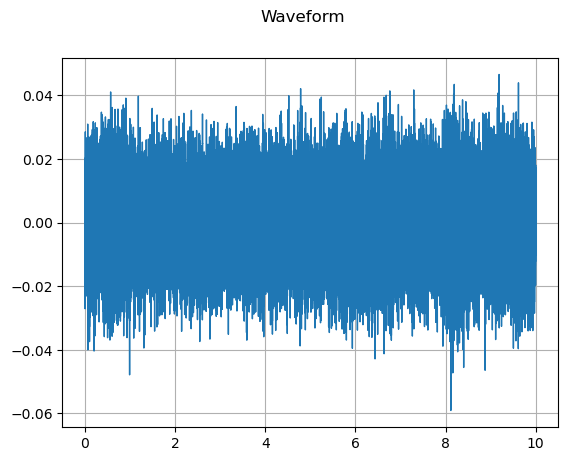

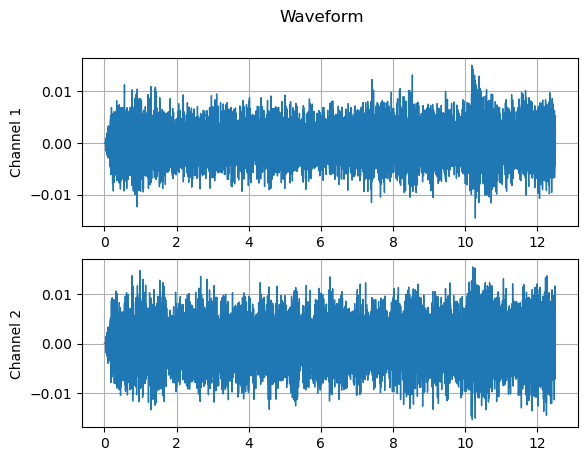

In [31]:
# Walk though the directory and extract features of each file 
for root,_,files in  os.walk( dir_file ):
    
    path_original = os.path.join(root,)
    waveform,sample_rate = torchaudio.load("/Users/irisroeloffzen/Documents/TUe/AIES/5ARIP10/dev_gearbox/train/section_00_source_train_normal_0000_volt_1.0.wav")
    # Define effects
    effects = [
        ["lowpass", "-1", "300"],  # apply single-pole lowpass filter
        ["speed", "0.8"],  # reduce the speed
        # This only changes sample rate, so it is necessary to
        # add `rate` effect with original sample rate after this.
        ["rate", f"{sample_rate}"],
        ["reverb", "-w"],  # Reverbration gives some dramatic feeling
    ]
    
    waveform2, sample_rate2 = torchaudio.sox_effects.apply_effects_tensor(waveform, sample_rate, effects)
        
        
def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
        if xlim:
            axes[c].set_xlim(xlim)
    figure.suptitle(title)
    plt.show(block=False)
    
plot_waveform(waveform, sample_rate, title="Waveform")
plot_waveform(waveform2, sample_rate2, title="Waveform")
